In [18]:

####################################################################################################
####################################################################################################

import sys
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display
from IPython.display import Image

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model


In [19]:

####################################################################################################
####################################################################################################

df_train_truth = pd.DataFrame.from_csv("../python_pax_reader/data/train_truth_v2.csv")
df_train_input = pd.DataFrame.from_csv("../python_pax_reader/data/train_input_v2.csv")



In [20]:

####################################################################################################
# First 127 are S2
####################################################################################################

df_train_input = df_train_input.iloc[:, 0:127]
df_train_input.shape


(924, 127)

,x,y
1,2.626434,-17.960824
2,-32.844888,-21.247503
3,10.907536,-6.312277
5,24.631697,-12.763601
6,2.726006,37.749081


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127
1,-161,0,0,34,-616,0,0,-58,-37,0,...,-52,0,-116,35,569,1558,3657,915,75,2583
2,0,0,0,0,0,0,206,0,0,0,...,-177,0,0,16,598,0,0,0,0,0
3,-343,0,0,0,-661,0,687,265,-59,53,...,-5,0,0,175,2766,7547,2998,2276,-111,3307
5,-26,0,43,404,-122,0,636,-172,-101,-41,...,69,0,-269,-74,817,270,-779,217,-96,1440
6,67,0,957,2189,1174,-352,969,-242,16,192,...,0,0,0,-285,0,0,-440,0,-131,0


(924,)


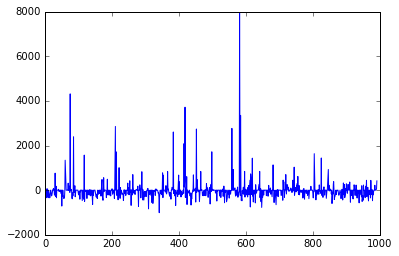

In [33]:

####################################################################################################
####################################################################################################

nRows = 5

#print()
display(df_train_truth[0:nRows][:])
#print()
display(df_train_input[0:nRows][:])
#print()

for i in range(0, 1):
    
    arr = df_train_input.iloc[:, i]
    print(arr.shape)
    plt.plot(arr)


In [22]:

##########################################################################################
##########################################################################################

num_input_nodes = 127


##########################################################################################
##########################################################################################

act = 'linear'
#act = 'tanh'

model = Sequential()
model.add(Dense(127, activation=act, input_dim=num_input_nodes))
model.add(BatchNormalization())
#model.add(Dense(1024, activation=act))
#model.add(Dense(512, activation=act))
model.add(Dense(100, activation=act))
model.add(Dense(100, activation=act))
model.add(Dense( 40, activation=act))
model.add(Dense( 40, activation=act))
model.add(Dense( 20, activation=act))
model.add(Dense( 20, activation=act))
model.add(Dense(  2))


##########################################################################################
##########################################################################################



In [23]:

##########################################################################################
##########################################################################################

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_absolute_error'            , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_absolute_percentage_error' , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_logarithmic_error' , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='squared_hinge'                  , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='hinge'                          , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_hinge'              , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='logcosh'                        , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy'       , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy'            , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='kullback_leibler_divergence'    , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='poisson'                        , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='cosine_proximity'               , optimizer='adam', metrics=['accuracy'])


##########################################################################################
##########################################################################################

print(df_train_input.shape)
print(df_train_truth.shape)


(924, 127)
(924, 2)


In [24]:

##########################################################################################
##########################################################################################

model.fit(df_train_input, df_train_truth, epochs=20, batch_size=32, verbose=1)
print("Done")


Epoch 1/20
924/924 [==============================] - 2s 2ms/step - loss: 404.0685 - acc: 0.5206
Epoch 2/20
924/924 [==============================] - 0s 151us/step - loss: 395.1984 - acc: 0.5812
Epoch 3/20
924/924 [==============================] - 0s 184us/step - loss: 390.3216 - acc: 0.5747
Epoch 4/20
924/924 [==============================] - 0s 187us/step - loss: 387.2022 - acc: 0.5736
Epoch 5/20
924/924 [==============================] - 0s 195us/step - loss: 383.9736 - acc: 0.5639
Epoch 6/20
924/924 [==============================] - 0s 312us/step - loss: 382.8242 - acc: 0.6115
Epoch 7/20
924/924 [==============================] - 0s 361us/step - loss: 380.6477 - acc: 0.5812
Epoch 8/20
924/924 [==============================] - 0s 276us/step - loss: 377.3761 - acc: 0.5963
Epoch 9/20
924/924 [==============================] - 0s 251us/step - loss: 375.5541 - acc: 0.5996
Epoch 10/20
924/924 [==============================] - 0s 313us/step - loss: 376.1816 - acc: 0.5855
Epoch 11/20

In [25]:

##########################################################################################
##########################################################################################

folder   = "models" + "/"    
name     = "model_posreco"
name_h5  = folder + name + ".h5"
name_png = folder + name + ".png"


##########################################################################################
##########################################################################################

model.save(name_h5, overwrite=True)



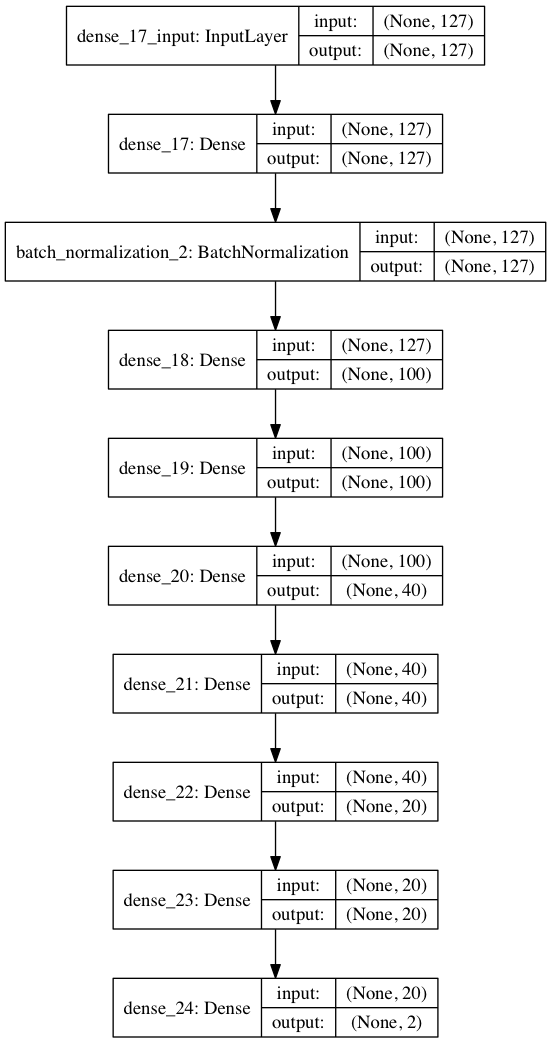

In [26]:

##########################################################################################
##########################################################################################

plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)

print()
Image(filename=name_png) 


In [12]:

##########################################################################################
# Convergence Plots
##########################################################################################
